In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [23]:
df=pd.read_csv("zomato.csv")

In [35]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),rating
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari,4.0
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,Banashankari,4.0
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet,Banashankari,3.0
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet,Banashankari,4.0
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet,Banashankari,4.0


In [25]:
df.drop(['url','phone','address','menu_item'],axis=1,inplace=True)

In [27]:
df['reviews_list']

,reviews_list
0,"[('Rated 4.0', 'RATED\n A beautiful place to ..."
1,"[('Rated 4.0', 'RATED\n Had been here for din..."
2,"[('Rated 3.0', ""RATED\n Ambience is not that ..."
3,"[('Rated 4.0', ""RATED\n Great food and proper..."
4,"[('Rated 4.0', 'RATED\n Very good restaurant ..."
...,...
51712,"[('Rated 5.0', ""RATED\n Food and service are ..."
51713,[]
51714,[]
51715,"[('Rated 4.0', 'RATED\n Nice and friendly pla..."


In [28]:
import re

def extract_rating(reviews_list):
    if isinstance(reviews_list, str) and reviews_list.strip():
        # Use regular expression to find 'Rated X.X' or 'Rated X'
        match = re.search(r"Rated\s+(\d+(\.\d+)?)", reviews_list)
        if match:
            try:
                return float(match.group(1))
            except ValueError:
                return None
    return None

# Apply the function to the 'reviews_list' column to create a new 'rating' column
df['rating'] = df['reviews_list'].apply(extract_rating)

# Display the DataFrame with the new 'rating' column
display(df[['rating']].head())

,rating
0,4.0
1,4.0
2,3.0
3,4.0
4,4.0


In [29]:
df.drop(['reviews_list'],axis=1,inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51717 non-null  object 
 1   online_order                 51717 non-null  object 
 2   book_table                   51717 non-null  object 
 3   rate                         43942 non-null  object 
 4   votes                        51717 non-null  int64  
 5   location                     51696 non-null  object 
 6   rest_type                    51490 non-null  object 
 7   dish_liked                   23639 non-null  object 
 8   cuisines                     51672 non-null  object 
 9   approx_cost(for two people)  51371 non-null  object 
 10  listed_in(type)              51717 non-null  object 
 11  listed_in(city)              51717 non-null  object 
 12  rating                       44122 non-null  float64
dtypes: float64(1), i

In [31]:
df.isnull().sum()

,0
name,0
online_order,0
book_table,0
rate,7775
votes,0
location,21
rest_type,227
dish_liked,28078
cuisines,45
approx_cost(for two people),346


In [32]:


# Clean the 'rate' column: replace non-numeric strings, remove '/5', and convert to float
df['rate'] = df['rate'].replace('NEW', np.nan)
df['rate'] = df['rate'].replace('-', np.nan)
df['rate'] = df['rate'].str.replace('/5', '', regex=False).str.strip()
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

# Fill missing values in 'rate' with its mode
# Check if there are any non-null values to calculate mode from to avoid errors
if not df['rate'].isnull().all():
    df['rate'].fillna(df['rate'].mode().iloc[0], inplace=True)
else:
    # Fallback if all values become NaN after cleaning (unlikely for this dataset)
    df['rate'].fillna(0.0, inplace=True)

In [33]:
# Clean 'approx_cost(for two people)': remove commas and convert to numeric
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',', '', regex=False)
df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'], errors='coerce')

# Fill missing values in 'approx_cost(for two people)' with its median
if not df['approx_cost(for two people)'].isnull().all():
    df['approx_cost(for two people)'].fillna(df['approx_cost(for two people)'].median(), inplace=True)
else:
    # Fallback if all values become NaN after cleaning
    df['approx_cost(for two people)'].fillna(0.0, inplace=True)


display(df[['approx_cost(for two people)']].isnull().sum())

,0
approx_cost(for two people),0


In [34]:
# Fill null values for categorical columns with their mode
df['location'].fillna(df['location'].mode()[0], inplace=True)
df['rest_type'].fillna(df['rest_type'].mode()[0], inplace=True)
df['cuisines'].fillna(df['cuisines'].mode()[0], inplace=True)

# Fill null values for 'dish_liked' with 'Not Specified' due to many missing values
df['dish_liked'].fillna('Not Specified', inplace=True)

# Fill null values for 'rating' with its mode
df['rating'].fillna(df['rating'].mode()[0], inplace=True)

# Display the null counts again to verify
display(df.isnull().sum())

,0
name,0
online_order,0
book_table,0
rate,0
votes,0
location,0
rest_type,0
dish_liked,0
cuisines,0
approx_cost(for two people),0


In [38]:
df['location'].nunique()


93

In [39]:
for col in df.columns:
    print(f"Column '{col}': {df[col].nunique()} unique values")

Column 'name': 8792 unique values
Column 'online_order': 2 unique values
Column 'book_table': 2 unique values
Column 'rate': 31 unique values
Column 'votes': 2328 unique values
Column 'location': 93 unique values
Column 'rest_type': 93 unique values
Column 'dish_liked': 5272 unique values
Column 'cuisines': 2723 unique values
Column 'approx_cost(for two people)': 70 unique values
Column 'listed_in(type)': 7 unique values
Column 'listed_in(city)': 30 unique values
Column 'rating': 9 unique values


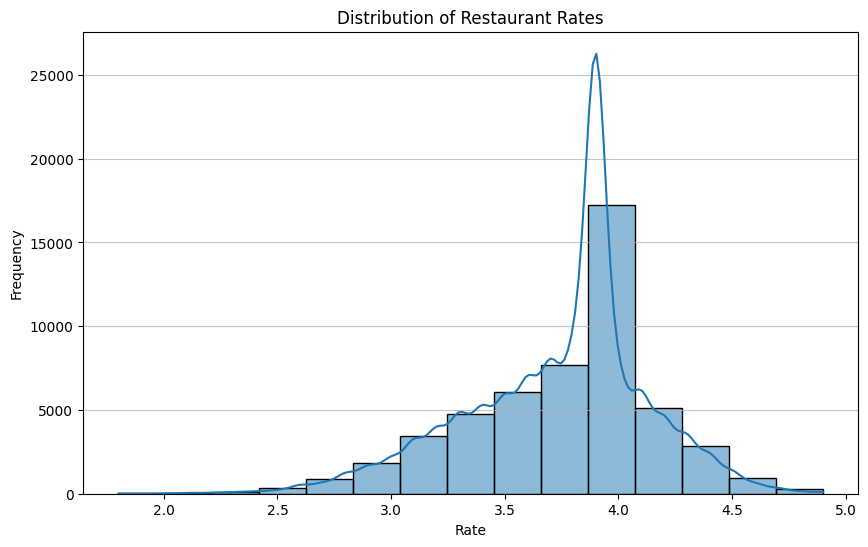

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['rate'], bins=15, kde=True)
plt.title('Distribution of Restaurant Rates')
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

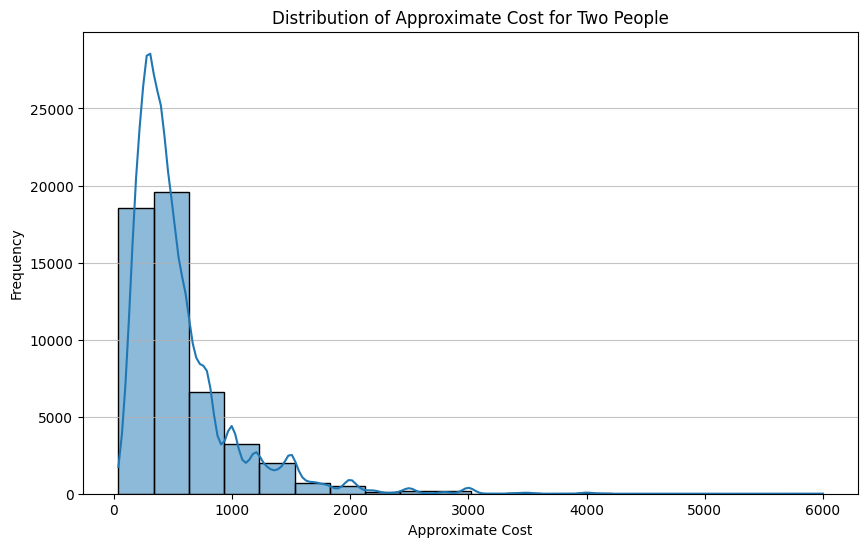

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['approx_cost(for two people)'], bins=20, kde=True)
plt.title('Distribution of Approximate Cost for Two People')
plt.xlabel('Approximate Cost')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

<Axes: xlabel='count', ylabel='rate'>

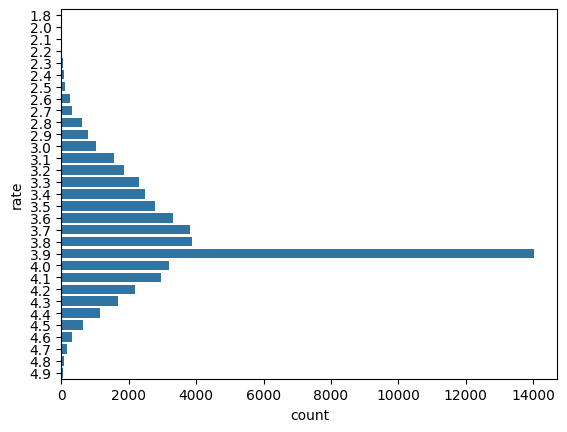

In [44]:
sns.countplot(data=df,y='rate')


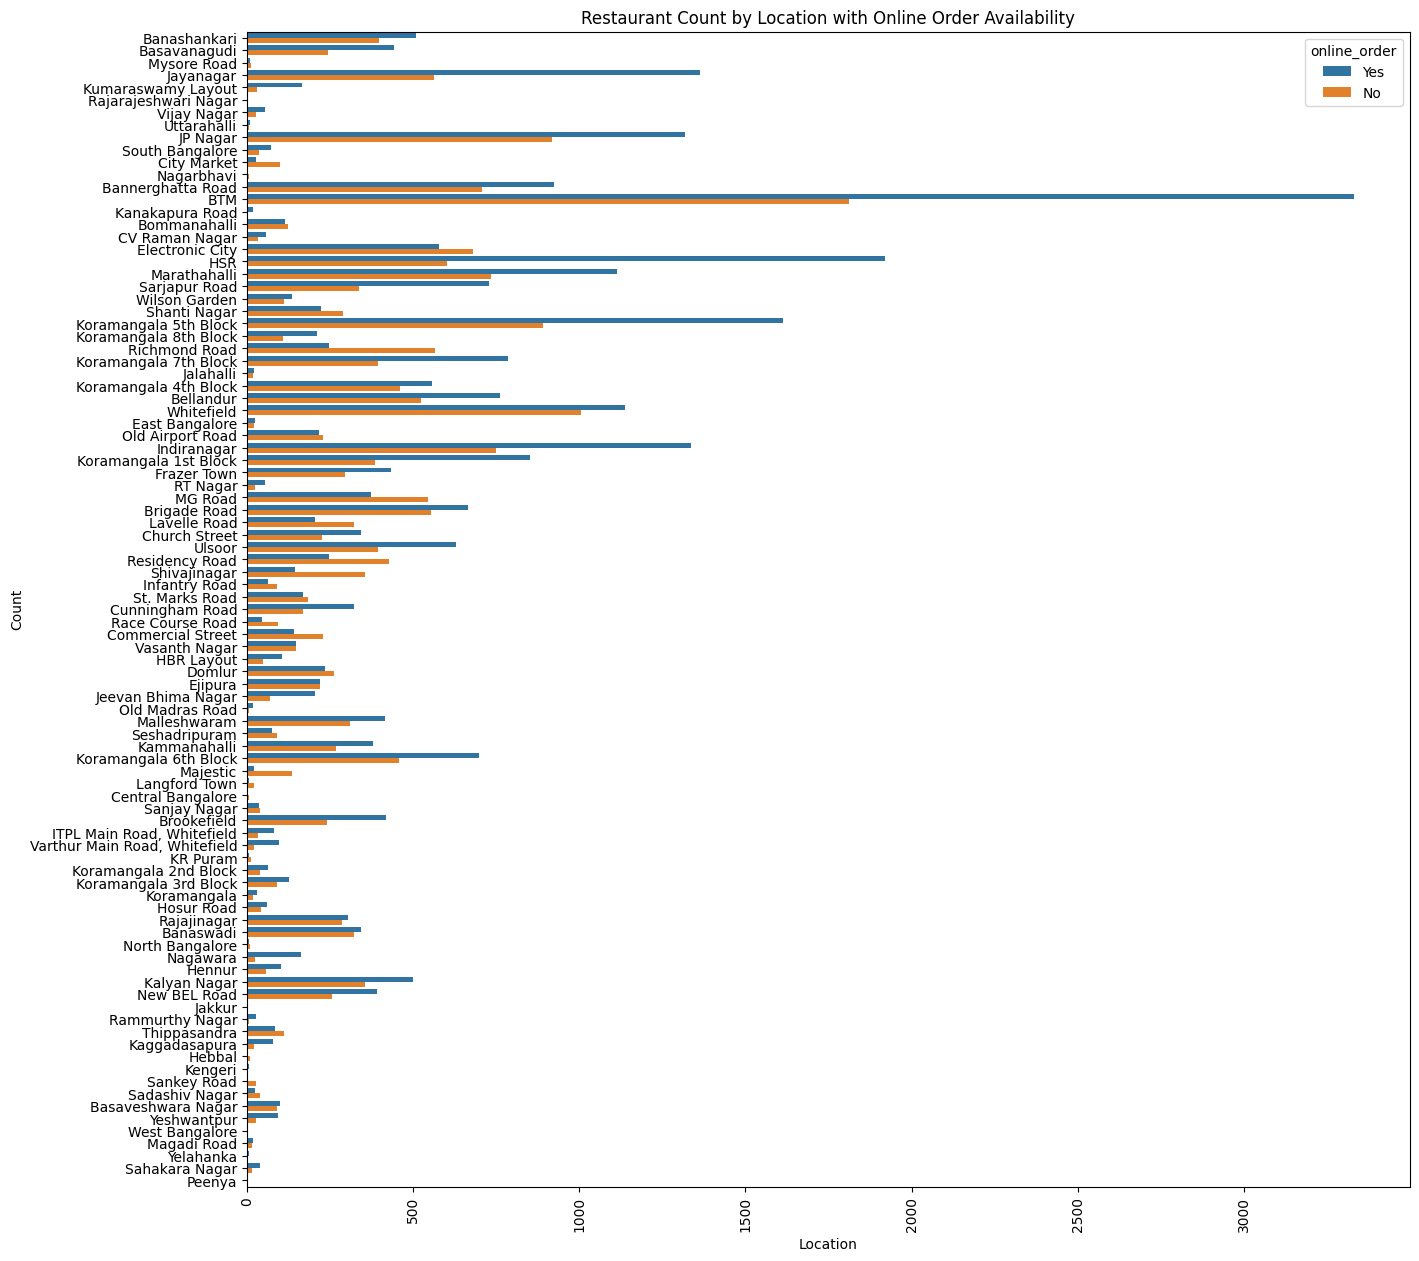

In [48]:
plt.figure(figsize=(15, 15))
sns.countplot(data=df, y='location', hue='online_order')
plt.xticks(rotation=90)
plt.title('Restaurant Count by Location with Online Order Availability')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

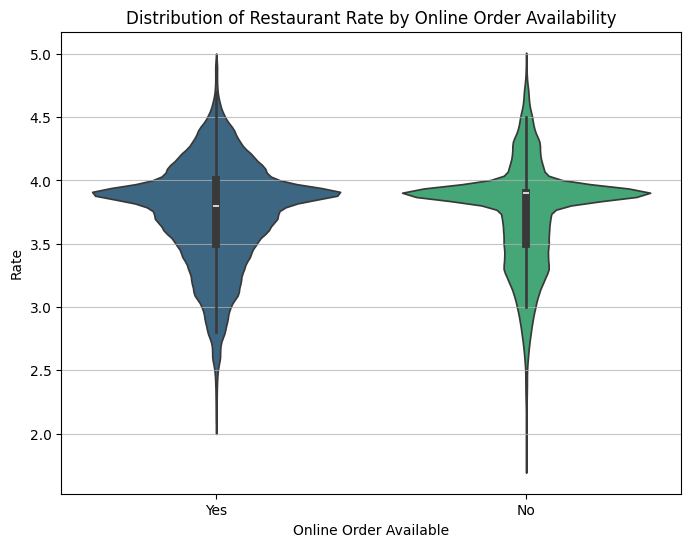

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='online_order', y='rate', palette='viridis')
plt.title('Distribution of Restaurant Rate by Online Order Availability')
plt.xlabel('Online Order Available')
plt.ylabel('Rate')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [50]:
def split_cuisines(cuisine_str):
    if isinstance(cuisine_str, str):
        return [c.strip() for c in cuisine_str.split(',')]
    return []

# Apply the function to the 'cuisines' column
cuisines_list = df['cuisines'].apply(split_cuisines)

# Explode the list of cuisines into separate rows
exploded_cuisines = cuisines_list.explode()

# Count the occurrences of each unique cuisine
cuisine_counts = exploded_cuisines.value_counts()

# Display the top 10 most common cuisines
print("Top 10 most common cuisines:")
print(cuisine_counts.head(10))

Top 10 most common cuisines:
cuisines
North Indian    21130
Chinese         15547
South Indian     8644
Fast Food        8096
Biryani          6492
Continental      5765
Desserts         5633
Cafe             5303
Beverages        4747
Italian          3389
Name: count, dtype: int64


In [51]:
top_15_cuisines = cuisine_counts.head(15).index.tolist()

print("Top 15 most frequent cuisines:")
print(top_15_cuisines)

Top 15 most frequent cuisines:
['North Indian', 'Chinese', 'South Indian', 'Fast Food', 'Biryani', 'Continental', 'Desserts', 'Cafe', 'Beverages', 'Italian', 'Bakery', 'Street Food', 'Pizza', 'Burger', 'Seafood']


In [52]:
data_for_plot = []

for index, row in df.iterrows():
    restaurant_cuisines = split_cuisines(row['cuisines'])
    restaurant_rate = row['rate']

    # Check if any of the restaurant's cuisines are in the top_15_cuisines
    for cuisine in restaurant_cuisines:
        if cuisine in top_15_cuisines:
            data_for_plot.append({'Cuisine': cuisine, 'Rate': restaurant_rate})

# Create a new DataFrame from the collected data
df_plot = pd.DataFrame(data_for_plot)

# Display the first few rows of the new DataFrame and its info to verify
display(df_plot.head())
display(df_plot.info())

,Cuisine,Rate
0,North Indian,4.1
1,Chinese,4.1
2,Chinese,4.1
3,North Indian,4.1
4,Cafe,3.8


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96073 entries, 0 to 96072
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Cuisine  96073 non-null  object 
 1   Rate     96073 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.5+ MB


None

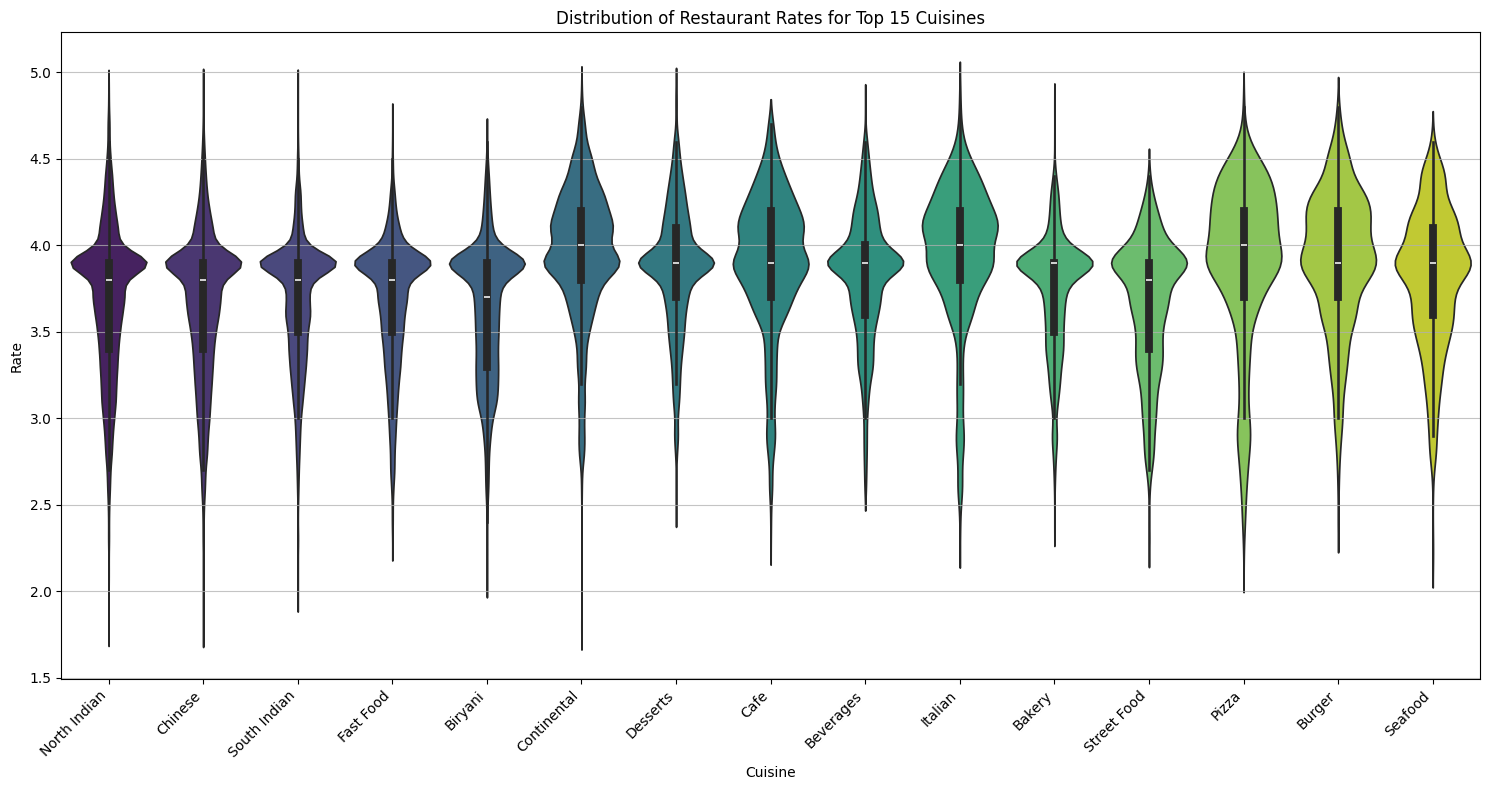

In [53]:
plt.figure(figsize=(15, 8))
sns.violinplot(data=df_plot, x='Cuisine', y='Rate', palette='viridis', order=top_15_cuisines)
plt.title('Distribution of Restaurant Rates for Top 15 Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Rate')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

In [54]:
max_rate = df['rate'].max()
print(f"The maximum rate in the DataFrame is: {max_rate}")

The maximum rate in the DataFrame is: 4.9


In [55]:
highest_rated_restaurants = df[df['rate'] == max_rate]
display(highest_rated_restaurants.head())

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),rating
3921,Byg Brewski Brewing Company,Yes,Yes,4.9,16345,Sarjapur Road,Microbrewery,"Cocktails, Dahi Kebab, Rajma Chawal, Butter Ch...","Continental, North Indian, Italian, South Indi...",1600.0,Delivery,Bellandur,5.0
4801,Byg Brewski Brewing Company,Yes,Yes,4.9,16345,Sarjapur Road,Microbrewery,"Cocktails, Dahi Kebab, Rajma Chawal, Butter Ch...","Continental, North Indian, Italian, South Indi...",1600.0,Dine-out,Bellandur,5.0
4944,Byg Brewski Brewing Company,Yes,Yes,4.9,16345,Sarjapur Road,Microbrewery,"Cocktails, Dahi Kebab, Rajma Chawal, Butter Ch...","Continental, North Indian, Italian, South Indi...",1600.0,Drinks & nightlife,Bellandur,5.0
5153,Belgian Waffle Factory,Yes,No,4.9,1746,Brigade Road,Dessert Parlor,"Coffee, Berryblast, Nachos, Chocolate Waffles,...",Desserts,400.0,Delivery,Brigade Road,3.0
5809,Belgian Waffle Factory,Yes,No,4.9,1746,Brigade Road,Dessert Parlor,"Coffee, Berryblast, Nachos, Chocolate Waffles,...",Desserts,400.0,Desserts,Brigade Road,3.0


In [56]:
def split_cuisines(cuisine_str):
    if isinstance(cuisine_str, str):
        return [c.strip() for c in cuisine_str.split(',')]
    return []

highest_rated_cuisines_list = highest_rated_restaurants['cuisines'].apply(split_cuisines)
exploded_highest_rated_cuisines = highest_rated_cuisines_list.explode()
highest_rated_cuisine_counts = exploded_highest_rated_cuisines.value_counts()

print("Top 10 most common cuisines among highest-rated restaurants:")
print(highest_rated_cuisine_counts.head(10))

Top 10 most common cuisines among highest-rated restaurants:
cuisines
Asian            22
North Indian     21
Momos            19
Thai             19
Chinese          19
Desserts         14
Mediterranean    11
BBQ              10
European          7
Continental       6
Name: count, dtype: int64


In [57]:
highest_rated_location_counts = highest_rated_restaurants['location'].value_counts()

print("Top 10 most common locations among highest-rated restaurants:")
print(highest_rated_location_counts.head(10))

Top 10 most common locations among highest-rated restaurants:
location
Koramangala 5th Block    20
Brigade Road             12
BTM                       7
Sarjapur Road             6
Whitefield                4
Malleshwaram              4
Indiranagar               2
Name: count, dtype: int64


In [58]:
print("Descriptive statistics for 'approx_cost(for two people)' among highest-rated restaurants:")
display(highest_rated_restaurants['approx_cost(for two people)'].describe())

Descriptive statistics for 'approx_cost(for two people)' among highest-rated restaurants:


,approx_cost(for two people)
count,55.000000
mean,1274.545455
std,540.992977
min,400.000000
25%,700.000000
50%,1500.000000
75%,1600.000000
max,2000.000000


In [59]:
average_rated_restaurants = df[(df['rate'] >= 3.5) & (df['rate'] <= 4.0)]
display(average_rated_restaurants.head())

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),rating
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet,Banashankari,3.0
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet,Banashankari,4.0
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet,Banashankari,4.0
5,Timepass Dinner,Yes,No,3.8,286,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600.0,Buffet,Banashankari,3.0
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,Mysore Road,Casual Dining,Not Specified,"North Indian, South Indian, Andhra, Chinese",800.0,Buffet,Banashankari,5.0


In [60]:
average_rated_cuisines_list = average_rated_restaurants['cuisines'].apply(split_cuisines)
exploded_average_rated_cuisines = average_rated_cuisines_list.explode()
average_rated_cuisine_counts = exploded_average_rated_cuisines.value_counts()

print("Top 10 most common cuisines among average-rated restaurants:")
print(average_rated_cuisine_counts.head(10))

Top 10 most common cuisines among average-rated restaurants:
cuisines
North Indian    12534
Chinese          9368
South Indian     5823
Fast Food        5474
Biryani          3945
Desserts         3410
Beverages        2931
Continental      2719
Cafe             2571
Bakery           1964
Name: count, dtype: int64


In [61]:
print("Top 10 most common cuisines among highest-rated restaurants:")
display(highest_rated_cuisine_counts.head(10))

print("\nTop 10 most common cuisines among average-rated restaurants:")
display(average_rated_cuisine_counts.head(10))

Top 10 most common cuisines among highest-rated restaurants:


,count
cuisines,
Asian,22
North Indian,21
Momos,19
Thai,19
Chinese,19
Desserts,14
Mediterranean,11
BBQ,10
European,7



Top 10 most common cuisines among average-rated restaurants:


,count
cuisines,
North Indian,12534
Chinese,9368
South Indian,5823
Fast Food,5474
Biryani,3945
Desserts,3410
Beverages,2931
Continental,2719
Cafe,2571


In [62]:
print("Top 10 most common cuisines among average-rated restaurants:")
display(average_rated_cuisine_counts.head(10))

Top 10 most common cuisines among average-rated restaurants:


,count
cuisines,
North Indian,12534
Chinese,9368
South Indian,5823
Fast Food,5474
Biryani,3945
Desserts,3410
Beverages,2931
Continental,2719
Cafe,2571


In [63]:
top_n = 10

# 1. Extract top 10 cuisines from highest_rated_cuisine_counts and convert to DataFrame
highest_rated_df = highest_rated_cuisine_counts.head(top_n).reset_index()
highest_rated_df.columns = ['Cuisine', 'Count']

# 2. Add 'Rating Category' column for highest rated
highest_rated_df['Rating Category'] = 'Highest Rated'

# 3. Extract top 10 cuisines from average_rated_cuisine_counts and convert to DataFrame
average_rated_df = average_rated_cuisine_counts.head(top_n).reset_index()
average_rated_df.columns = ['Cuisine', 'Count']

# 4. Add 'Rating Category' column for average rated
average_rated_df['Rating Category'] = 'Average Rated'

# 5. Concatenate the two DataFrames
combined_cuisine_counts_df = pd.concat([highest_rated_df, average_rated_df], ignore_index=True)

# 6. Display the first few rows of the combined DataFrame
display(combined_cuisine_counts_df.head())

,Cuisine,Count,Rating Category
0,Asian,22,Highest Rated
1,North Indian,21,Highest Rated
2,Momos,19,Highest Rated
3,Thai,19,Highest Rated
4,Chinese,19,Highest Rated


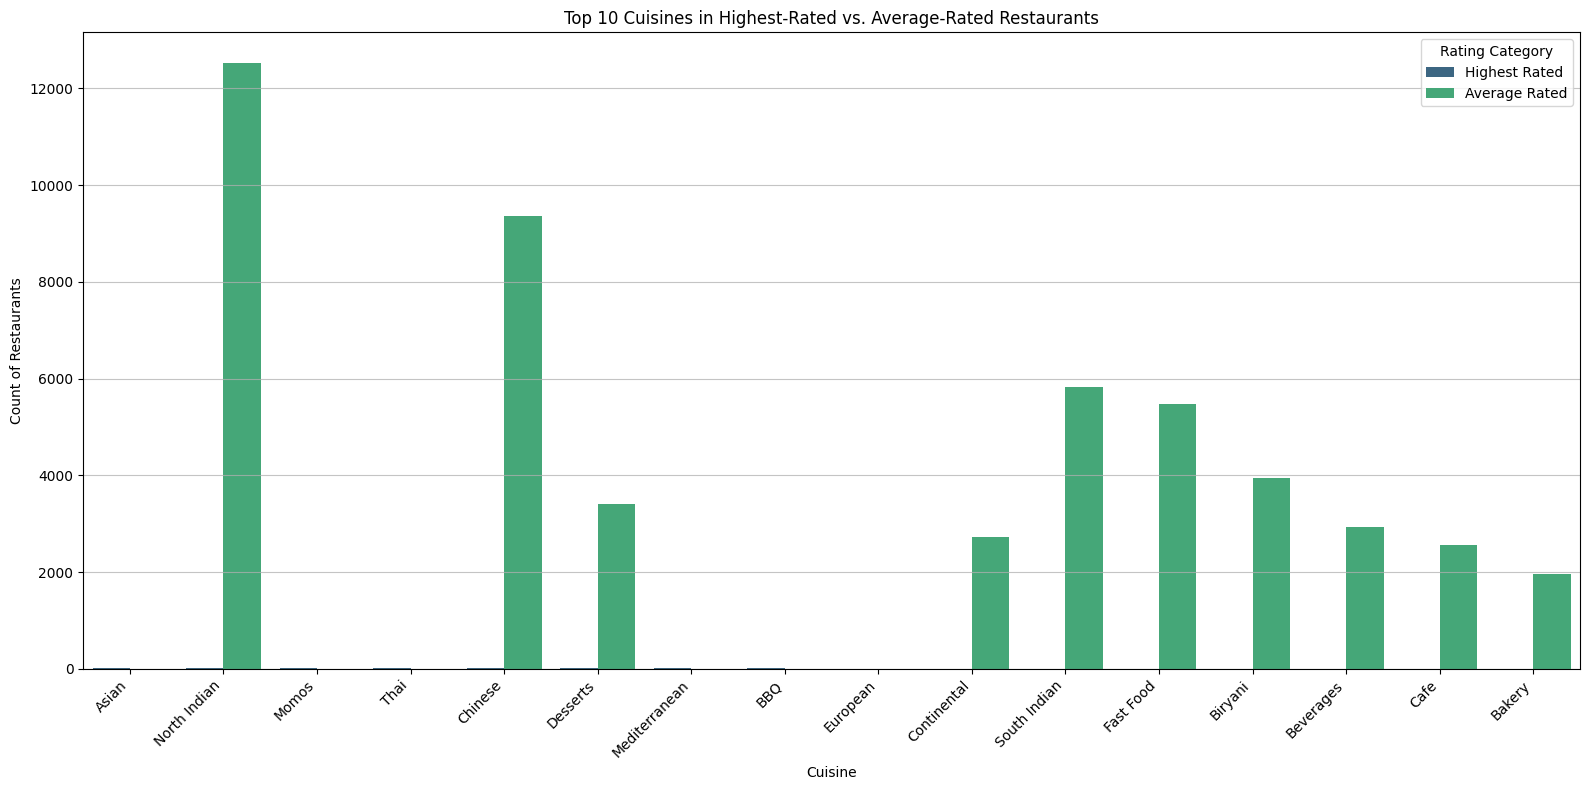

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 8))
sns.barplot(data=combined_cuisine_counts_df, x='Cuisine', y='Count', hue='Rating Category', palette='viridis')
plt.title('Top 10 Cuisines in Highest-Rated vs. Average-Rated Restaurants')
plt.xlabel('Cuisine')
plt.ylabel('Count of Restaurants')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Rating Category')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()


Directory 'analysis_reports' already exists.
'distribution_of_restaurant_rates.pdf' saved to 'analysis_reports'.
'distribution_of_approx_cost.pdf' saved to 'analysis_reports'.
'distribution_of_votes.pdf' saved to 'analysis_reports'.
'rate_by_online_order.pdf' saved to 'analysis_reports'.
'top_cuisines_comparison.pdf' saved to 'analysis_reports'.


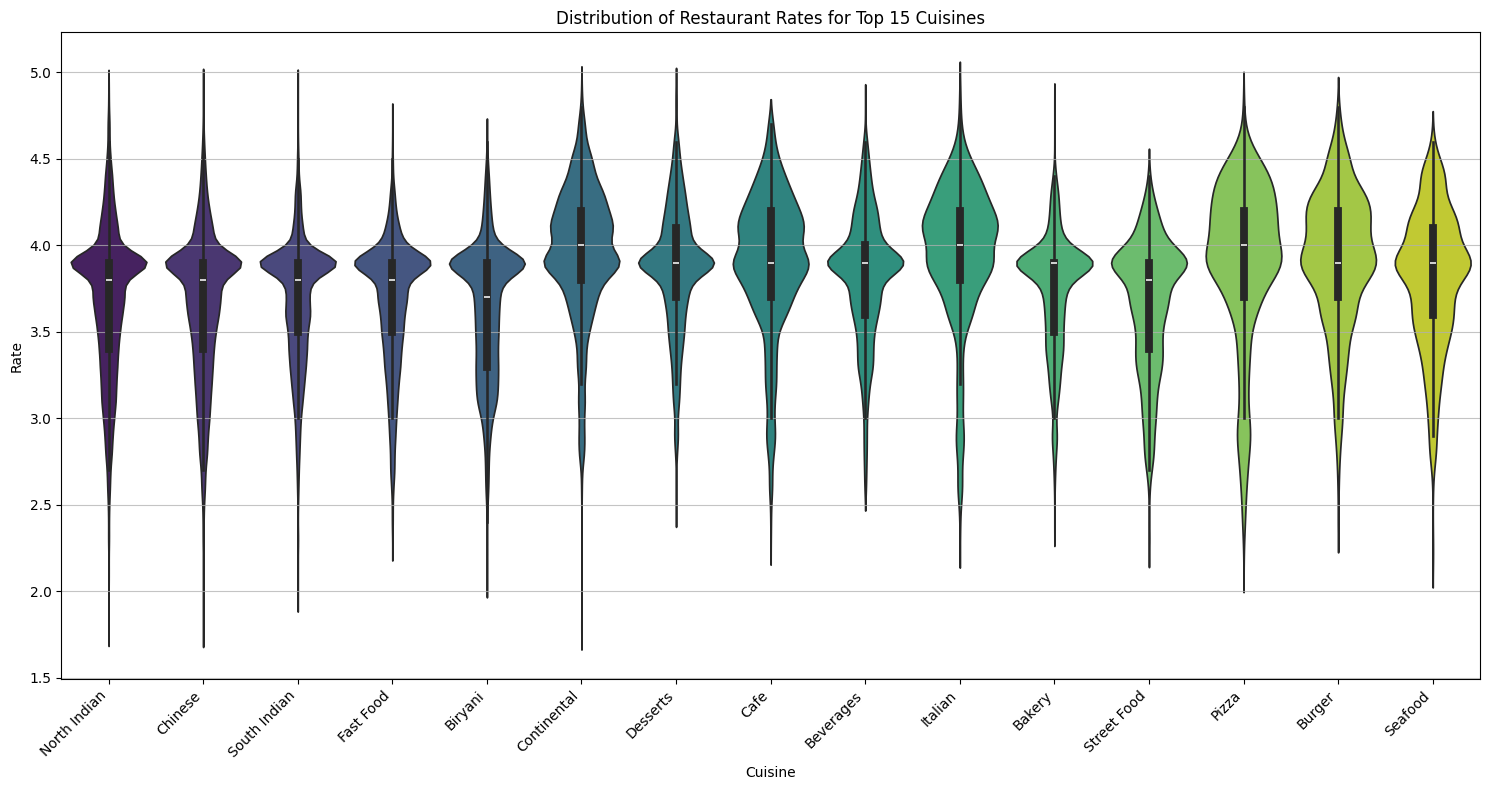

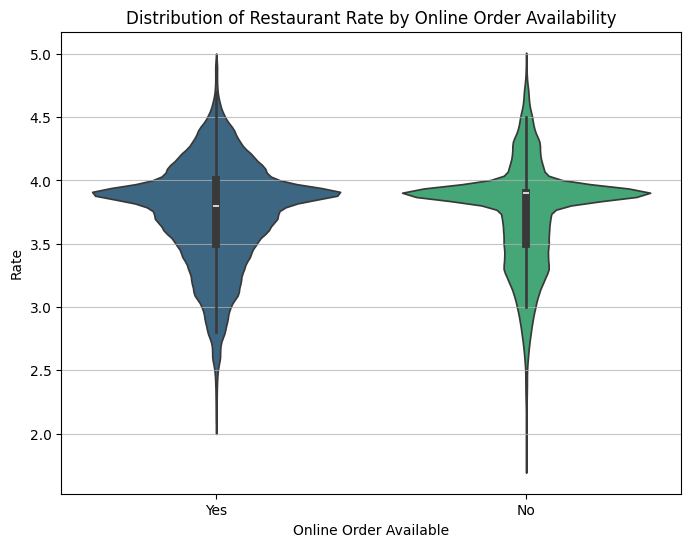

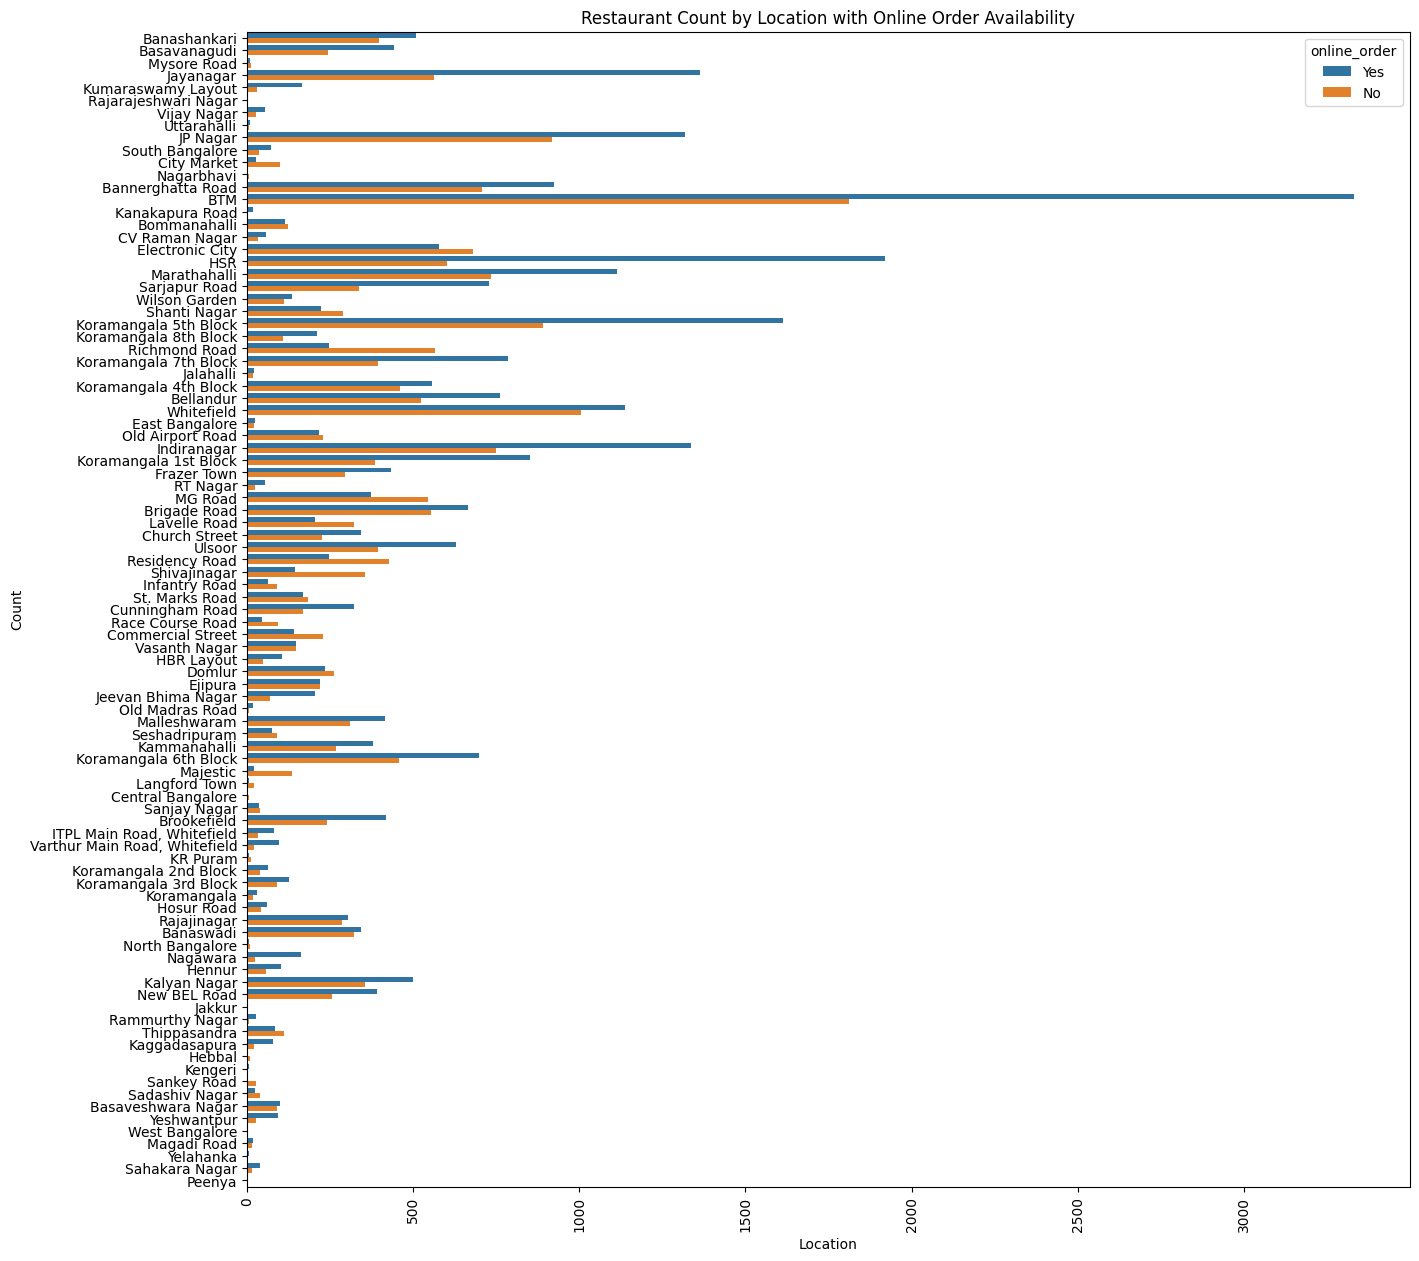

In [68]:
import os
import matplotlib.pyplot as plt

# Define the directory name
output_dir = 'analysis_reports'

# Create the directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Directory '{output_dir}' created.")
else:
    print(f"Directory '{output_dir}' already exists.")

# Example: Save the 'Distribution of Restaurant Rates' plot
# You would need to re-generate the plot to save it after creating the directory

# First, re-create the plot for 'rate'
plt.figure(figsize=(10, 6))
sns.histplot(df['rate'], bins=15, kde=True)
plt.title('Distribution of Restaurant Rates')
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Save the plot to the created directory
plt.savefig(os.path.join(output_dir, 'distribution_of_restaurant_rates.pdf'))
plt.close() # Close the plot to prevent it from displaying twice
print(f"'distribution_of_restaurant_rates.pdf' saved to '{output_dir}'.")


# Example: Save the 'Distribution of Approximate Cost for Two People' plot
# Re-create the plot
plt.figure(figsize=(10, 6))
sns.histplot(df['approx_cost(for two people)'], bins=20, kde=True)
plt.title('Distribution of Approximate Cost for Two People')
plt.xlabel('Approximate Cost')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Save the plot
plt.savefig(os.path.join(output_dir, 'distribution_of_approx_cost.pdf'))
plt.close()
print(f"'distribution_of_approx_cost.pdf' saved to '{output_dir}'.")


# Example: Save the 'Distribution of Votes' plot
plt.figure(figsize=(10, 6))
sns.histplot(df['votes'], bins=30, kde=True)
plt.title('Distribution of Votes')
plt.xlabel('Votes')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.savefig(os.path.join(output_dir, 'distribution_of_votes.pdf'))
plt.close()
print(f"'distribution_of_votes.pdf' saved to '{output_dir}'.")


# Example: Save the 'Distribution of Restaurant Rate by Online Order Availability' plot
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='online_order', y='rate', palette='viridis')
plt.title('Distribution of Restaurant Rate by Online Order Availability')
plt.xlabel('Online Order Available')
plt.ylabel('Rate')
plt.grid(axis='y', alpha=0.75)
plt.savefig(os.path.join(output_dir, 'rate_by_online_order.pdf'))
plt.close()
print(f"'rate_by_online_order.pdf' saved to '{output_dir}'.")


# Example: Save the 'Top 10 Cuisines in Highest-Rated vs. Average-Rated Restaurants' plot
plt.figure(figsize=(16, 8))
sns.barplot(data=combined_cuisine_counts_df, x='Cuisine', y='Count', hue='Rating Category', palette='viridis')
plt.title('Top 10 Cuisines in Highest-Rated vs. Average-Rated Restaurants')
plt.xlabel('Cuisine')
plt.ylabel('Count of Restaurants')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Rating Category')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'top_cuisines_comparison.pdf'))
plt.close()
print(f"'top_cuisines_comparison.pdf' saved to '{output_dir}'.")

plt.figure(figsize=(15, 8))
sns.violinplot(data=df_plot, x='Cuisine', y='Rate', palette='viridis', order=top_15_cuisines)
plt.title('Distribution of Restaurant Rates for Top 15 Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Rate')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.75)
plt.savefig(os.path.join(output_dir, 'Distribution of Restaurant Rates for Top 15 Cuisines'))
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='online_order', y='rate', palette='viridis')
plt.title('Distribution of Restaurant Rate by Online Order Availability')
plt.xlabel('Online Order Available')
plt.ylabel('Rate')
plt.grid(axis='y', alpha=0.75)
plt.savefig(os.path.join(output_dir, 'Distribution of Restaurant Rate by Online Order Availability'))
plt.show()


plt.figure(figsize=(15, 15))
sns.countplot(data=df, y='location', hue='online_order')
plt.xticks(rotation=90)
plt.title('Restaurant Count by Location with Online Order Availability')
plt.xlabel('Location')
plt.ylabel('Count')
plt.savefig(os.path.join(output_dir, 'Restaurant Count by Location with Online Order Availability'))
plt.show()



In [66]:
import os

def create_ds_structure(candidate_name):
    root_dir = f"ds_{candidate_name}"

    # Define paths
    paths = [
        root_dir,
        os.path.join(root_dir, "csv_files"),
        os.path.join(root_dir, "outputs"),
    ]

    # Create directories
    for path in paths:
        os.makedirs(path, exist_ok=True)

    # Create placeholder files
    open(os.path.join(root_dir, "notebook_1.ipynb"), 'w').close()
    open(os.path.join(root_dir, "notebook_2.ipynb"), 'w').close()
    open(os.path.join(root_dir, "ds_report.pdf"), 'w').close()
    open(os.path.join(root_dir, "README.md"), 'w').close()

    print(f"Project structure created under: {root_dir}")

# Example usage
create_ds_structure("Sangeetha")


Project structure created under: ds_Sangeetha


In [70]:
readme_content = """
# Data Analysis Project: Zomato Dataset

## Project Description
This project involves an in-depth exploratory data analysis (EDA) of a Zomato restaurant dataset. The goal is to uncover insights related to restaurant ratings, cuisine preferences, cost distribution, and the impact of online ordering.

## Analysis Steps & Key Findings

### 1. Data Loading and Initial Inspection
- Loaded the `zomato.csv` dataset.
- Performed initial data inspections (`.head()`, `.info()`, `.isnull().sum()`).

### 2. Data Cleaning and Preprocessing
- Dropped irrelevant columns (`url`, `phone`, `address`, `menu_item`, `reviews_list`).
- Cleaned and converted `rate` column to numeric, filling missing values with the mode.
- Cleaned and converted `approx_cost(for two people)` to numeric, filling missing values with the median.
- Filled missing values in `location`, `rest_type`, `cuisines`, and `rating` with their respective modes.
- Filled missing values in `dish_liked` with 'Not Specified'.

### 3. Exploratory Data Analysis (EDA)
- **Distribution of Restaurant Rates**: Visualized the frequency of different restaurant ratings.
- **Distribution of Approximate Cost for Two People**: Analyzed the spread of dining costs.
- **Distribution of Votes**: Explored the number of votes received by restaurants.
- **Relationship between Rate and Online Order Availability**: Examined how online order options affect ratings using a violin plot.
- **Top 15 Cuisines Rate Distribution**: Visualized the rate distribution for the most popular cuisines.

### 4. Characteristics of Highest-Rated Restaurants (Rate 4.9)
- Identified restaurants with the maximum rate (4.9).
- Analyzed common **cuisines**: 'Asian', 'North Indian', 'Momos', 'Thai', 'Chinese' were prominent.
- Analyzed common **locations**: 'Koramangala 5th Block', 'Brigade Road', 'BTM' were frequently observed.
- Analyzed **approximate cost**: Mean cost of ~1274.55 INR, indicating a mid-to-high budget segment.

### 5. Comparison: Highest-Rated vs. Average-Rated Cuisines
- Defined average-rated restaurants as those with a rate between 3.5 and 4.0.
- Compared top 10 cuisines for both highest-rated and average-rated restaurants.
- **Key Findings**:
    - **Shared Popularity**: 'North Indian', 'Chinese', 'Desserts', 'Continental' are popular across both categories.
    - **Highest-Rated Differentiators**: Cuisines like 'Asian', 'Momos', 'Thai', 'Mediterranean', 'BBQ', 'European' are more prominent in the highest-rated group, suggesting specialization or exceptional execution.
    - **Average-Rated Volume**: 'South Indian', 'Fast Food', 'Biryani', 'Beverages', 'Cafe', 'Bakery' are highly frequent in the average-rated group, catering to broad, everyday demand.
    - **Quality vs. Volume**: Significant scale difference; achieving highest ratings with common cuisines is rare, indicating superior quality.

## Visualizations and Reports
All generated plots and analysis reports (if applicable) are saved in the `analysis_reports/` directory within this project. You can find detailed figures such as:
- `distribution_of_restaurant_rates.pdf`
- `distribution_of_approx_cost.pdf`
- `distribution_of_votes.pdf`
- `rate_by_online_order.pdf`
- `top_cuisines_comparison.pdf`
- `Distribution of Restaurant Rates for Top 15 Cuisines`
- `Restaurant Count by Location with Online Order Availability`
- `Distribution of Restaurant Rate by Online Order Availability`

## Project Structure
```
ds_Sangeetha/
├── csv_files/
├── outputs/
├── notebook_1.ipynb
├── notebook_2.ipynb
├── ds_report.pdf
├── README.md
```

## How to Use
1.  **Clone this repository** (if applicable).
2.  **Open the Jupyter Notebooks** (`notebook_1.ipynb`) to follow the analysis steps.
3.  **Inspect the `analysis_reports/` folder** for all generated visualizations and PDF reports.

"""

# Create or overwrite README.md in the root directory (or project directory if specified)
readme_path = os.path.join("ds_Sangeetha", "README.md") # Assuming 'ds_Sangeetha' is the root project directory created earlier

with open(readme_path, 'w') as f:
    f.write(readme_content)

print(f"'README.md' created in '{readme_path}'.")

'README.md' created in 'ds_Sangeetha/README.md'.
